In [1]:
from sklearn import svm
import numpy as np
import pandas as pd
import pyreadstat 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

In [2]:
df, meta= pyreadstat.read_sav("cleaned_survey.sav")

In [3]:
x = df.loc[:,["社經地位","時間規劃","自信心","內在動機"]]
y = df.iloc[:,44]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [5]:
# param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly']}

In [6]:
# svm = svm.SVR()
# grid = GridSearchCV(svm,param_grid,verbose=False)
# grid.fit(X_train,y_train)

In [7]:
svm = svm.SVR(C = 1,gamma=0.1, kernel='rbf',verbose=False)
# grid = GridSearchCV(svm,c = 1,gamma=0.1, kernel='rbf',verbose=False)
svm.fit(X_train,y_train)

SVR(C=1, gamma=0.1)

In [8]:
train_preds = svm.predict(X_train)

In [9]:
test_preds = svm.predict(X_test)

In [10]:
def mape(y_true, y_pred):
    mape  = np.mean(np.abs((y_true - y_pred) / y_true)) *100
#     (絕對值(真實值-預測值)/真實值)/平均*100
    return mape

In [11]:
mape(y_train,train_preds)

13.83004478834999

In [12]:
mape(y_test, test_preds)

12.523038878967242

In [13]:
MAPE = (np.abs(y_test - test_preds) / y_test *100)
MAPE

305    15.822015
68     63.314246
128     3.763391
126    12.241277
339     1.452528
         ...    
26      4.049502
153    12.523166
365    78.093902
423    20.202607
345     0.165702
Name: 英語自評能力, Length: 90, dtype: float64

In [14]:
data = np.array([y_test, test_preds, MAPE])
final = pd.DataFrame(data).transpose()
final.head()

,0,1,2
0,3.4,2.862051,15.822015
1,1.0,1.633142,63.314246
2,3.2,3.079571,3.763391
3,2.6,2.918273,12.241277
4,2.8,2.840671,1.452528


In [15]:
final.columns = ["true","predict","precent"]

In [16]:
final.head()

,true,predict,precent
0,3.4,2.862051,15.822015
1,1.0,1.633142,63.314246
2,3.2,3.079571,3.763391
3,2.6,2.918273,12.241277
4,2.8,2.840671,1.452528


In [17]:
final.true

0     3.4
1     1.0
2     3.2
3     2.6
4     2.8
     ... 
85    2.4
86    3.0
87    1.2
88    3.0
89    2.0
Name: true, Length: 90, dtype: float64

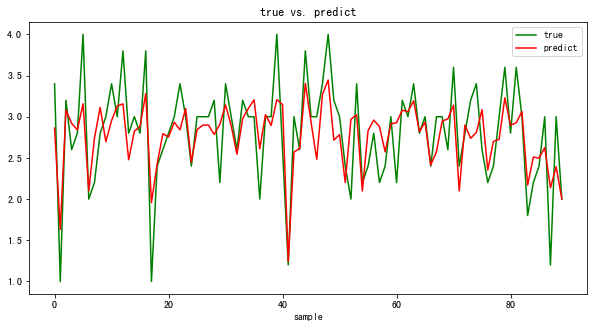

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(final.index, final.true, color='g', label ="true")
plt.xlabel('sample') # 設定x軸標題
plt.plot(final.index, final.predict,color='r',label ="predict")
plt.legend()
plt.title('true vs. predict') # 設定圖表標題
plt.show()